# "Customer Purchase Propensity - Data Cleaning and Feature Engineering Pipeline"

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv("customers.csv")
df

,customer_id,first_name,last_name,age,gender,income,city,signup_date
0,CUST1000,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22
1,CUST1001,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26
2,CUST1002,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05
3,CUST1003,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30
4,CUST1004,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30
...,...,...,...,...,...,...,...,...
495,CUST1495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29
496,CUST1496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17
497,CUST1497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28
498,CUST1498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04


In [4]:
df.head()

,customer_id,first_name,last_name,age,gender,income,city,signup_date
0,CUST1000,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22
1,CUST1001,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26
2,CUST1002,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05
3,CUST1003,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30
4,CUST1004,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30


In [5]:
df.tail()

,customer_id,first_name,last_name,age,gender,income,city,signup_date
495,CUST1495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29
496,CUST1496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17
497,CUST1497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28
498,CUST1498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04
499,CUST1499,Daniel,Schultz,18.0,Other,56962.02,Snowton,2025-07-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  500 non-null    object 
 1   first_name   500 non-null    object 
 2   last_name    500 non-null    object 
 3   age          475 non-null    float64
 4   gender       500 non-null    object 
 5   income       475 non-null    float64
 6   city         500 non-null    object 
 7   signup_date  500 non-null    object 
dtypes: float64(2), object(6)
memory usage: 31.4+ KB


In [7]:
df.describe()

,age,income
count,475.000000,475.000000
mean,44.115789,51445.303074
std,14.976256,15940.745251
min,18.000000,8230.470000
25%,32.000000,40557.925000
50%,45.000000,51176.130000
75%,56.000000,62305.465000
max,69.000000,97510.580000


In [8]:
df.isnull().sum()

customer_id     0
first_name      0
last_name       0
age            25
gender          0
income         25
city            0
signup_date     0
dtype: int64

In [9]:
df.shape

(500, 8)

In [10]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'age', 'gender', 'income',
       'city', 'signup_date'],
      dtype='object')

In [11]:
num_cols = df.select_dtypes(include=["float64","int"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

In [12]:
num_cols,cat_cols

(Index(['age', 'income'], dtype='object'),
 Index(['customer_id', 'first_name', 'last_name', 'gender', 'city',
        'signup_date'],
       dtype='object'))

### Univariate Analysis

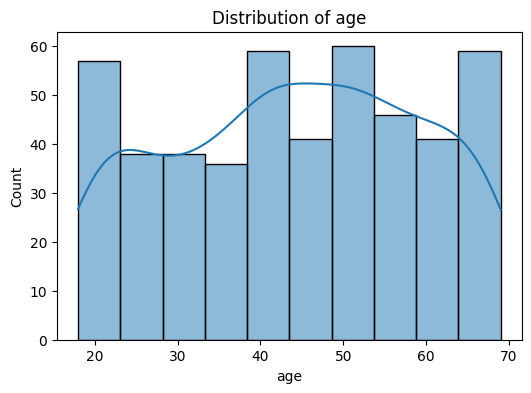

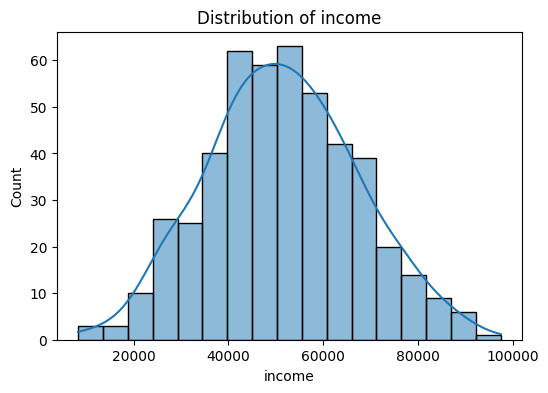

In [13]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Income it's the Normal Distributed.

In [14]:
df[num_cols].skew().sort_values(ascending=False)

income    0.088105
age      -0.100187
dtype: float64

In [15]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df,explorative=True)
profile.to_file("Profiling Report.html")

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 125.11it/s]


### Bivariate Analysis

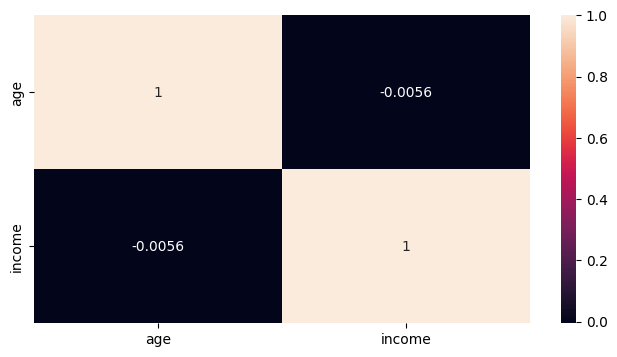

In [16]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
df.groupby("age")["income"].mean()

age
18.0    57861.317500
19.0    50200.597143
20.0    56205.046000
21.0    56382.566250
22.0    44987.866000
23.0    50722.042222
24.0    52210.098571
25.0    50788.330000
26.0    56874.251111
28.0    50705.670000
29.0    51425.413333
30.0    49722.127500
31.0    47559.585714
32.0    47274.870000
33.0    48108.647500
34.0    52393.778333
35.0    39969.774286
36.0    52300.575000
37.0    39569.666250
38.0    52401.781667
39.0    49619.308000
40.0    58363.381000
41.0    46816.420714
42.0    55827.546667
43.0    49688.614545
44.0    54904.870000
45.0    52146.132500
46.0    43756.662857
47.0    54791.021429
48.0    40029.040000
49.0    56044.259231
50.0    52769.801765
51.0    39578.678000
52.0    48685.907333
53.0    47245.654286
54.0    48286.430909
55.0    56706.650000
56.0    51296.553333
57.0    62294.131111
58.0    53278.576250
59.0    60647.284000
60.0    58042.103333
61.0    47725.053846
62.0    50559.743333
63.0    49084.962000
64.0    44039.340000
65.0    57988.034167
66.0    4

### Multivariate Analysis

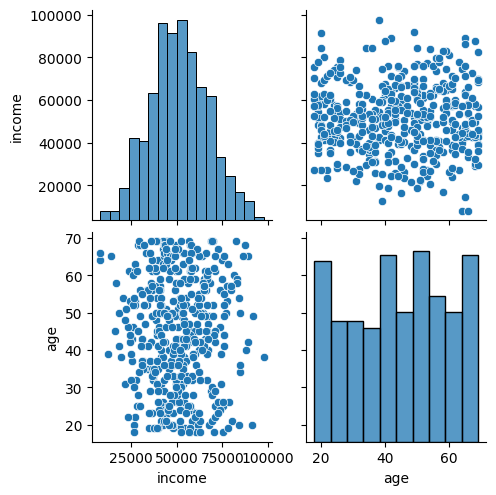

In [18]:
sns.pairplot(df[["income", "age",]])
plt.show()

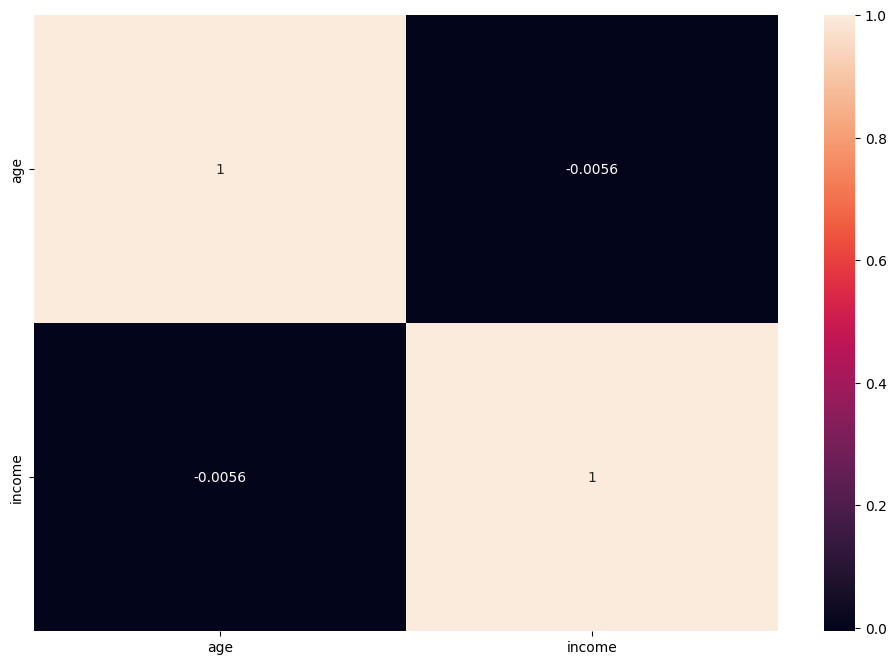

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Negative relation.

### Handling Missing Data

In [20]:
df.isnull().sum()

customer_id     0
first_name      0
last_name       0
age            25
gender          0
income         25
city            0
signup_date     0
dtype: int64

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

df_mi = df.copy()

numeric_simple_pip = Pipeline([("Imputer",SimpleImputer(strategy="mean"))])

In [22]:
numeric_simple_pip

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('Imputer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissin

In [23]:
cat_simple_pip = Pipeline([("Imputer",SimpleImputer(strategy="most_frequent"))])

In [24]:
cat_simple_pip

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('Imputer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'most_frequent'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has

In [25]:
simple_preprocessor = ColumnTransformer([
    ("Numeric", numeric_simple_pip, num_cols),
    ("Categoric", cat_simple_pip, cat_cols)
])

In [26]:
simple_preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('Numeric', ...), ('Categoric', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name

In [27]:
df_mi=simple_preprocessor.fit_transform(df)

In [28]:
np.ndarray

numpy.ndarray

In [29]:
df_mi = pd.DataFrame(df_mi)

In [30]:
df_mi.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [31]:
df_knn = df.copy()
from sklearn.impute import KNNImputer
numeric_knn_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5))
])
knnpre = ColumnTransformer(transformers=[("Number",numeric_knn_pipeline,num_cols)],remainder="passthrough")
knnpre

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('Number', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. ``""{

In [32]:
df_knn = knnpre.fit_transform(df_knn)

In [33]:
df_knn = pd.DataFrame(df_knn)
df_knn.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

### Outlier Handling

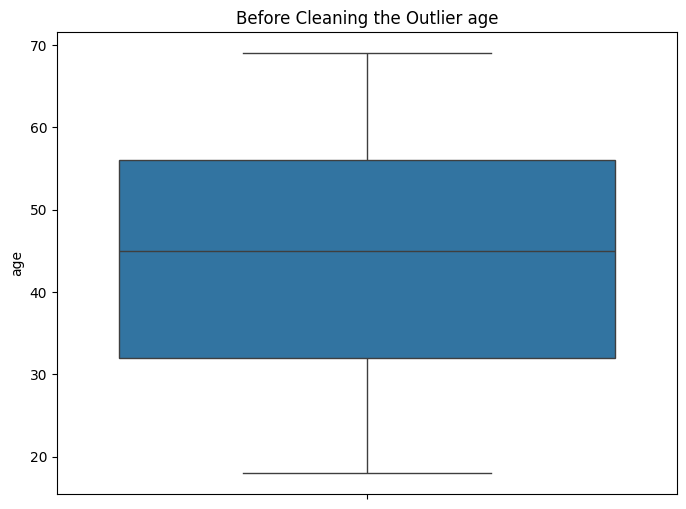

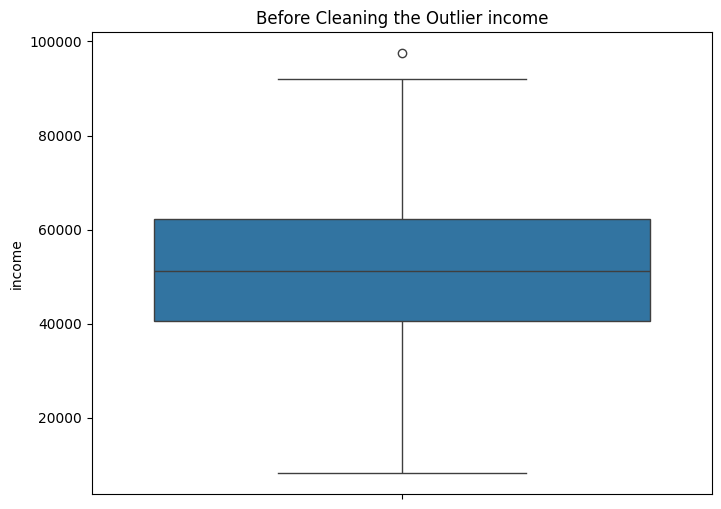

In [34]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[col])
    plt.title(f"Before Cleaning the Outlier {col}")
    plt.show()

Outlier Present in the Income Column.

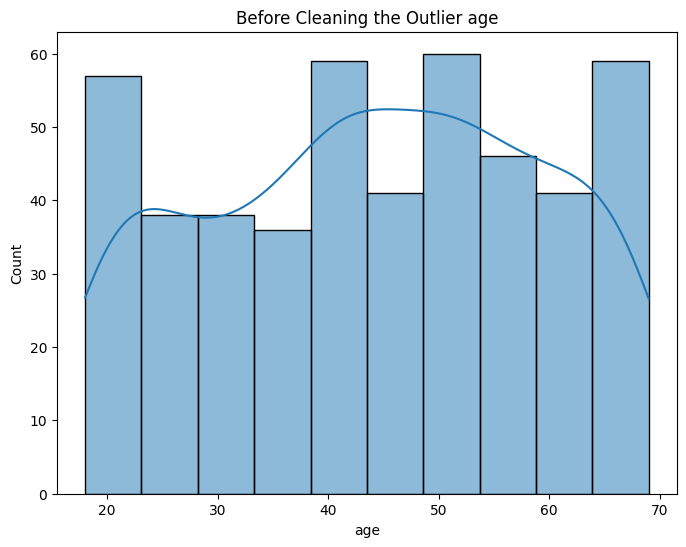

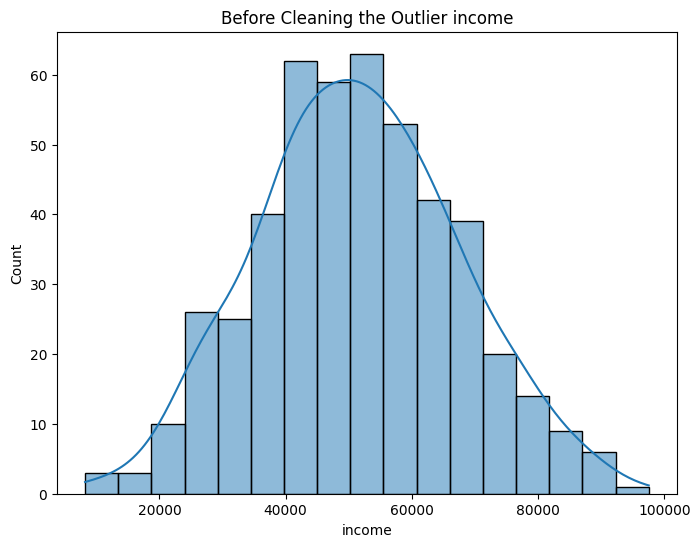

In [35]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col],kde=True)
    plt.title(f"Before Cleaning the Outlier {col}")
    plt.show()

Income is the Nommal Distributed.

#### IQR Method

In [36]:
df_iqr = df.copy()

for col in ["age", "income"]:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

df_iqr.shape

(449, 8)

In [37]:
df_iqr.head()

,customer_id,first_name,last_name,age,gender,income,city,signup_date
1,CUST1001,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26
2,CUST1002,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05
3,CUST1003,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30
4,CUST1004,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30
5,CUST1005,Elizabeth,Holmes,25.0,Male,70863.55,New Taylor,2024-02-08


#### Percentile & Winsorization Method

In [38]:
for col in ["age", "income"]:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [39]:
df.shape

(500, 8)

In [40]:
df.head()

,customer_id,first_name,last_name,age,gender,income,city,signup_date
0,CUST1000,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22
1,CUST1001,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26
2,CUST1002,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05
3,CUST1003,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30
4,CUST1004,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30


### Handling Mixed & Data/Time Variable

In [41]:
df_new = df.copy()
df_new

,customer_id,first_name,last_name,age,gender,income,city,signup_date
0,CUST1000,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22
1,CUST1001,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26
2,CUST1002,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05
3,CUST1003,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30
4,CUST1004,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30
...,...,...,...,...,...,...,...,...
495,CUST1495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29
496,CUST1496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17
497,CUST1497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28
498,CUST1498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04


In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  500 non-null    object 
 1   first_name   500 non-null    object 
 2   last_name    500 non-null    object 
 3   age          475 non-null    float64
 4   gender       500 non-null    object 
 5   income       475 non-null    float64
 6   city         500 non-null    object 
 7   signup_date  500 non-null    object 
dtypes: float64(2), object(6)
memory usage: 31.4+ KB


In [43]:
df_new["signup_date"] = pd.to_datetime(df_new["signup_date"])

In [44]:
df_new["last_purchase_date"] = df_new["signup_date"] + pd.to_timedelta(90, unit="D")

In [45]:
df_new

,customer_id,first_name,last_name,age,gender,income,city,signup_date,last_purchase_date
0,CUST1000,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22,2025-04-22
1,CUST1001,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26,2024-10-24
2,CUST1002,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05,2026-05-06
3,CUST1003,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30,2024-10-28
4,CUST1004,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30,2026-03-30
...,...,...,...,...,...,...,...,...,...
495,CUST1495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29,2024-10-27
496,CUST1496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17,2026-04-17
497,CUST1497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28,2023-11-26
498,CUST1498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04,2024-06-02


In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         500 non-null    object        
 1   first_name          500 non-null    object        
 2   last_name           500 non-null    object        
 3   age                 475 non-null    float64       
 4   gender              500 non-null    object        
 5   income              475 non-null    float64       
 6   city                500 non-null    object        
 7   signup_date         500 non-null    datetime64[ns]
 8   last_purchase_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 35.3+ KB


In [47]:
today = pd.Timestamp.today()

df_new["days_since_last_purchase"] = (today - df_new["last_purchase_date"]).dt.days

In [48]:
df_new["days_since_last_purchase"]

0      307
1      487
2      -72
3      483
4      -35
      ... 
495    484
496    -53
497    820
498    631
499    147
Name: days_since_last_purchase, Length: 500, dtype: int64

In [49]:
# Extract the Text part
df_new["customer_prefix"] = df_new["customer_id"].str.extract("([A-Za-z]+)")

# Extract the numeric part
df_new["customer_num"] = df_new["customer_id"].str.extract("(\d+)").astype(int)

In [50]:
df_new

,customer_id,first_name,last_name,age,gender,income,city,signup_date,last_purchase_date,days_since_last_purchase,customer_prefix,customer_num
0,CUST1000,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22,2025-04-22,307,CUST,1000
1,CUST1001,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26,2024-10-24,487,CUST,1001
2,CUST1002,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05,2026-05-06,-72,CUST,1002
3,CUST1003,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30,2024-10-28,483,CUST,1003
4,CUST1004,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30,2026-03-30,-35,CUST,1004
...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST1495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29,2024-10-27,484,CUST,1495
496,CUST1496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17,2026-04-17,-53,CUST,1496
497,CUST1497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28,2023-11-26,820,CUST,1497
498,CUST1498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04,2024-06-02,631,CUST,1498


In [51]:
df_new.drop(columns=["customer_id"],inplace=True)

In [52]:
df_new

,first_name,last_name,age,gender,income,city,signup_date,last_purchase_date,days_since_last_purchase,customer_prefix,customer_num
0,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22,2025-04-22,307,CUST,1000
1,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26,2024-10-24,487,CUST,1001
2,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05,2026-05-06,-72,CUST,1002
3,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30,2024-10-28,483,CUST,1003
4,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30,2026-03-30,-35,CUST,1004
...,...,...,...,...,...,...,...,...,...,...,...
495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29,2024-10-27,484,CUST,1495
496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17,2026-04-17,-53,CUST,1496
497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28,2023-11-26,820,CUST,1497
498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04,2024-06-02,631,CUST,1498


### Encoding Categorical Data

#### LabelEncoder for th Gender column

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_new["gender_label"] = le.fit_transform(df_new["gender"])

In [54]:
df_new

,first_name,last_name,age,gender,income,city,signup_date,last_purchase_date,days_since_last_purchase,customer_prefix,customer_num,gender_label
0,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22,2025-04-22,307,CUST,1000,1
1,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26,2024-10-24,487,CUST,1001,2
2,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05,2026-05-06,-72,CUST,1002,2
3,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30,2024-10-28,483,CUST,1003,1
4,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30,2026-03-30,-35,CUST,1004,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29,2024-10-27,484,CUST,1495,1
496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17,2026-04-17,-53,CUST,1496,1
497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28,2023-11-26,820,CUST,1497,1
498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04,2024-06-02,631,CUST,1498,0


#### OneHotEncoder

In [55]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse_output=False)

encoded = ohe.fit_transform(df_new[["city"]])

encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(["city"])
)

encoded_df.head()

,city_Adamsstad,city_Alanville,city_Albertshire,city_Aliciaborough,city_Alisonland,city_Allenburgh,city_Alvarezmouth,city_Amandamouth,city_Amandaport,city_Andersonland,...,city_Whitneymouth,city_Williamfurt,city_Williamport,city_Williamsbury,city_Williamsfurt,city_Williamshaven,city_Williamsmouth,city_Williamsontown,city_Woodsfurt,city_Zavalamouth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling

In [56]:
df_new

,first_name,last_name,age,gender,income,city,signup_date,last_purchase_date,days_since_last_purchase,customer_prefix,customer_num,gender_label
0,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22,2025-04-22,307,CUST,1000,1
1,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26,2024-10-24,487,CUST,1001,2
2,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05,2026-05-06,-72,CUST,1002,2
3,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30,2024-10-28,483,CUST,1003,1
4,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30,2026-03-30,-35,CUST,1004,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29,2024-10-27,484,CUST,1495,1
496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17,2026-04-17,-53,CUST,1496,1
497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28,2023-11-26,820,CUST,1497,1
498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04,2024-06-02,631,CUST,1498,0


##### StandardScaler

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
scaler = StandardScaler()
df_new[["age_scl","income_scl","days_scl"]] = scaler.fit_transform(df_new[["age","income","days_since_last_purchase"]])
df_new

,first_name,last_name,age,gender,income,city,signup_date,last_purchase_date,days_since_last_purchase,customer_prefix,customer_num,gender_label,age_scl,income_scl,days_scl
0,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22,2025-04-22,307,CUST,1000,1,0.794373,NaN,-0.468950
1,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26,2024-10-24,487,CUST,1001,2,1.663329,1.982684,0.100586
2,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05,2026-05-06,-72,CUST,1002,2,0.125946,1.399979,-1.668141
3,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30,2024-10-28,483,CUST,1003,1,-0.809853,0.437918,0.087930
4,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30,2026-03-30,-35,CUST,1004,0,1.061744,1.898277,-1.551069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29,2024-10-27,484,CUST,1495,1,1.395958,2.212462,0.091094
496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17,2026-04-17,-53,CUST,1496,1,-0.141425,0.529398,-1.608023
497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28,2023-11-26,820,CUST,1497,1,0.861216,1.795179,1.154229
498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04,2024-06-02,631,CUST,1498,0,1.195430,1.198110,0.556216


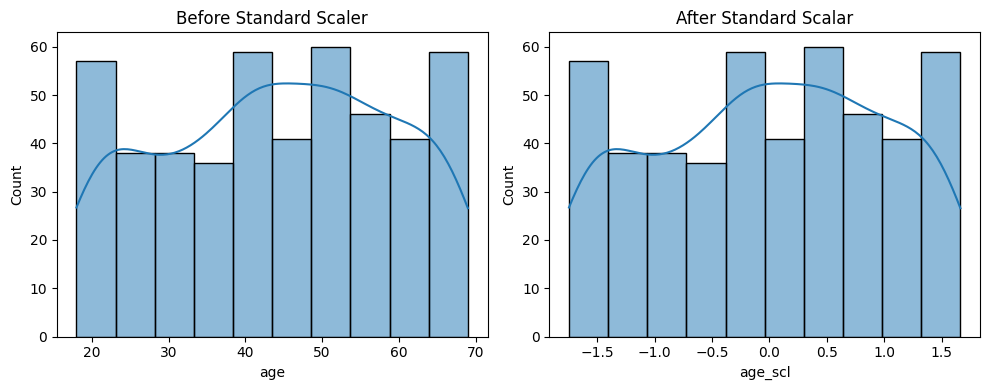

In [76]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["age"], kde=True)
plt.title("Before Standard Scaler")

plt.subplot(1,2,2)
sns.histplot(df_new["age_scl"], kde=True)
plt.title("After Standard Scalar")

plt.tight_layout()
plt.show()

The comparison between Before StandardScaler and After StandardScaler shows that scaling does not change the shape of the distribution.

In [58]:
minmax = MinMaxScaler()
df_new[["age_minmax","Income_minmax","Days_minmax"]] = minmax.fit_transform(df_new[["age","income","days_since_last_purchase"]])
df_new

,first_name,last_name,age,gender,income,city,signup_date,last_purchase_date,days_since_last_purchase,customer_prefix,customer_num,gender_label,age_scl,income_scl,days_scl,age_minmax,Income_minmax,Days_minmax
0,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22,2025-04-22,307,CUST,1000,1,0.794373,NaN,-0.468950,0.745098,NaN,0.356881
1,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26,2024-10-24,487,CUST,1001,2,1.663329,1.982684,0.100586,1.000000,0.923293,0.522018
2,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05,2026-05-06,-72,CUST,1002,2,0.125946,1.399979,-1.668141,0.549020,0.794763,0.009174
3,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30,2024-10-28,483,CUST,1003,1,-0.809853,0.437918,0.087930,0.274510,0.582557,0.518349
4,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30,2026-03-30,-35,CUST,1004,0,1.061744,1.898277,-1.551069,0.823529,0.904675,0.043119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29,2024-10-27,484,CUST,1495,1,1.395958,2.212462,0.091094,0.921569,0.973976,0.519266
496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17,2026-04-17,-53,CUST,1496,1,-0.141425,0.529398,-1.608023,0.470588,0.602735,0.026606
497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28,2023-11-26,820,CUST,1497,1,0.861216,1.795179,1.154229,0.764706,0.881934,0.827523
498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04,2024-06-02,631,CUST,1498,0,1.195430,1.198110,0.556216,0.862745,0.750236,0.654128


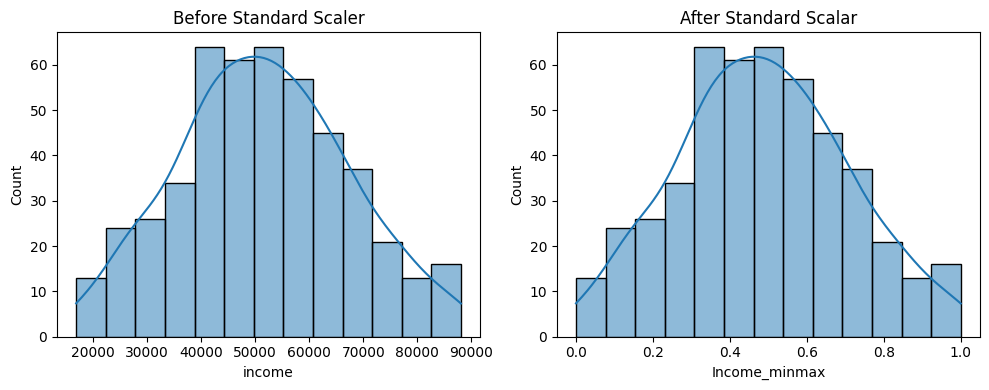

In [78]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["income"], kde=True)
plt.title("Before Standard Scaler")

plt.subplot(1,2,2)
sns.histplot(df_new["Income_minmax"], kde=True)
plt.title("After Standard Scalar")

plt.tight_layout()
plt.show()

Scaling changes the numerical range (frequency spread on axis) but does not change the distribution behavior or pattern of the data.

### Feature Construction & Tansformation

In [59]:
df_new['recency_score'] = 1 / (df_new['days_since_last_purchase'] + 1)

In [60]:
df_new["recency_score"]

0      0.003247
1      0.002049
2     -0.014085
3      0.002066
4     -0.029412
         ...   
495    0.002062
496   -0.019231
497    0.001218
498    0.001582
499    0.006757
Name: recency_score, Length: 500, dtype: float64

Recent Customer Score is high.

### Apply Transformation 

##### Log Tranformation

In [61]:
df_new['income_log'] = np.log1p(df_new['income'])

##### SquareRoot Tranformation

In [62]:
df_new['income_sqrt'] = np.sqrt(df_new['income'])

##### Power Tranformation

In [63]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_new[['income_power']] = pt.fit_transform(df_new[['income']])

In [64]:
df_new

,first_name,last_name,age,gender,income,city,signup_date,last_purchase_date,days_since_last_purchase,customer_prefix,...,age_scl,income_scl,days_scl,age_minmax,Income_minmax,Days_minmax,recency_score,income_log,income_sqrt,income_power
0,Calvin,Hill,56.0,Male,NaN,Hillville,2025-01-22,2025-04-22,307,CUST,...,0.794373,NaN,-0.468950,0.745098,NaN,0.356881,0.003247,NaN,NaN,NaN
1,Diana,Hall,69.0,Other,82592.63,Lake Stephen,2024-07-26,2024-10-24,487,CUST,...,1.663329,1.982684,0.100586,1.000000,0.923293,0.522018,0.002049,11.321688,287.389335,1.907584
2,Kimberly,Manning,46.0,Other,73442.20,New Jodifort,2026-02-05,2026-05-06,-72,CUST,...,0.125946,1.399979,-1.668141,0.549020,0.794763,0.009174,-0.014085,11.204268,271.002214,1.371764
3,Samantha,Drake,32.0,Male,58334.60,Nashburgh,2024-07-30,2024-10-28,483,CUST,...,-0.809853,0.437918,0.087930,0.274510,0.582557,0.518349,0.002066,10.973968,241.525568,0.458812
4,Kimberly,Sanchez,60.0,Female,81267.16,Lake Erikaburgh,2025-12-30,2026-03-30,-35,CUST,...,1.061744,1.898277,-1.551069,0.823529,0.904675,0.043119,-0.029412,11.305510,285.073955,1.830675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Andrew,Leonard,65.0,Male,86200.91,Christopherstad,2024-07-29,2024-10-27,484,CUST,...,1.395958,2.212462,0.091094,0.921569,0.973976,0.519266,0.002062,11.364448,293.599915,2.115813
496,Mindy,Mueller,42.0,Male,59771.14,East Bradley,2026-01-17,2026-04-17,-53,CUST,...,-0.141425,0.529398,-1.608023,0.470588,0.602735,0.026606,-0.019231,10.998295,244.481369,0.547350
497,Sarah,Eaton,57.0,Male,79648.16,West Kenneth,2023-08-28,2023-11-26,820,CUST,...,0.861216,1.795179,1.154229,0.764706,0.881934,0.827523,0.001218,11.285387,282.220056,1.736419
498,Melissa,Stein,62.0,Female,70272.18,Jenniferview,2024-03-04,2024-06-02,631,CUST,...,1.195430,1.198110,0.556216,0.862745,0.750236,0.654128,0.001582,11.160145,265.089004,1.183323


#### Income Binning

In [65]:
df_new['income_bin'] = pd.qcut(df_new['income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [66]:
df_new['income_bin']

0            NaN
1      Very High
2      Very High
3           High
4      Very High
         ...    
495    Very High
496         High
497    Very High
498    Very High
499         High
Name: income_bin, Length: 500, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [83]:
df_new['income_bin'].value_counts()

income_bin
Low          119
Medium       119
Very High    119
High         118
Name: count, dtype: int64

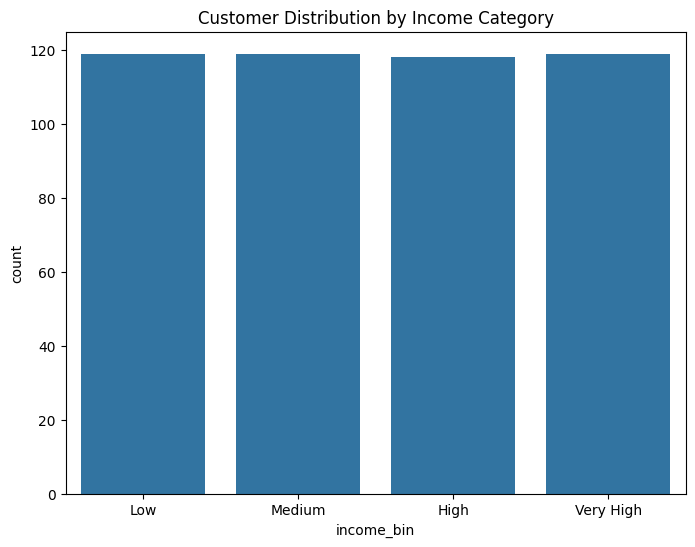

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(x="income_bin", data=df_new)
plt.title("Customer Distribution by Income Category")
plt.show()

Customers are evenly distributed across income quartiles using quantile-based binning.

#### Binary Conversion 

In [67]:
df_new['frequent_buyer'] = df_new['days_since_last_purchase'].apply(lambda x: 1 if x < 90 else 0)

In [68]:
df_new["frequent_buyer"]

0      0
1      0
2      1
3      0
4      1
      ..
495    0
496    1
497    0
498    0
499    0
Name: frequent_buyer, Length: 500, dtype: int64

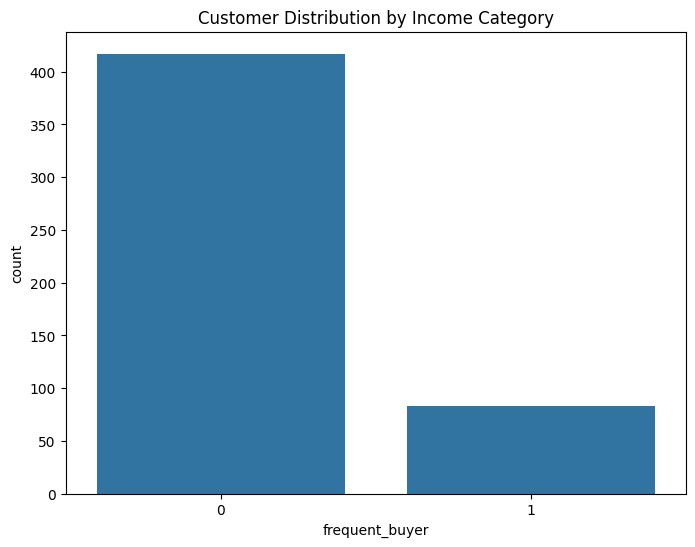

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(x="frequent_buyer", data=df_new)
plt.title("Customer Distribution by Income Category")
plt.show()

The dataset shows a higher number of non-frequent buyers compared to frequent buyers. This indicates class imbalance, which should be considered during model building to avoid biased predictions.

## Final Output

In [70]:
df_new.to_csv("processed_customer_data.csv", index=False)

In [71]:
print("Before Cleaning Data Shape:",df.shape)
print("After Cleaning Data Shape:",df_new.shape)

Before Cleaning Data Shape: (500, 8)
After Cleaning Data Shape: (500, 24)


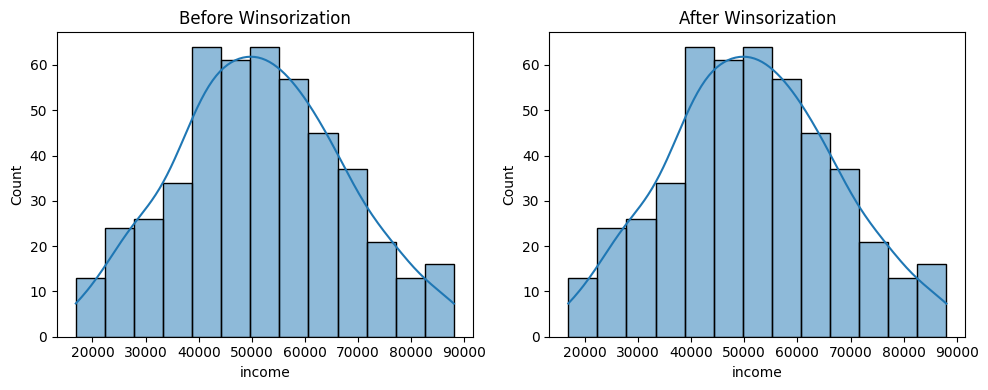

In [72]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["income"], kde=True)
plt.title("Before Winsorization")

plt.subplot(1,2,2)
sns.histplot(df_new["income"], kde=True)
plt.title("After Winsorization")

plt.tight_layout()
plt.show()

After applying percentile-based winsorization, extreme values were capped, resulting in a more stable and less skewed distribution.

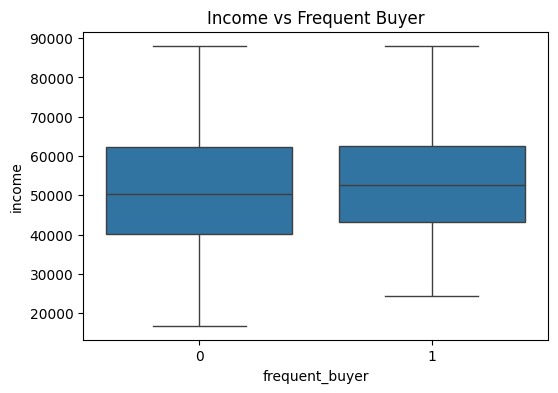

In [73]:
plt.figure(figsize=(6,4))
sns.boxplot(x="frequent_buyer", y="income", data=df_new)
plt.title("Income vs Frequent Buyer")
plt.show()

Frequent buyers tend to show different income patterns compared to non-frequent buyers.

# Summary

This project focused on performing a complete data preprocessing and feature engineering pipeline on a customer dataset to prepare it for machine learning modeling and business analysis.

#### Exploratory Data Analysis (EDA)


Analyzed numerical and categorical feature distributions.

Checked skewness and spread of variables.

Identified missing values and outliers.

Evaluated relationships between income, age, and frequent buyer status.

#### Missing Value Treatment

Applied mean imputation for numerical features.

Used appropriate strategies for categorical variables.

Ensured no missing values remained in the final dataset.

Result: Clean and complete dataset ready for transformation.

#### Outlier Treatment

Detected outliers using boxplots and IQR method.

Applied percentile-based Winsorization to cap extreme values.

Preserved dataset size while reducing skew impact.

Result: Stabilized numerical distributions without losing important data.

#### Feature Engineering

Created meaningful new features:

Recency score (customer activity measurement)

Income bin categories (Low / Medium / High)

Frequent buyer flag

Date-based derived features

These features enhance segmentation and predictive power.

#### Encoding & Scaling

Applied label and one-hot encoding where required.

Used StandardScaler for normalization.

Confirmed that scaling changed magnitude but not distribution behavior.

Result: Features are standardized and model-ready.